In [9]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd

In [11]:
url_get = requests.get('https://monexnews.com/kurs-valuta-asing.htm?kurs=JPY&searchdatefrom=01-01-2019&searchdateto=31-12-2019')

In [12]:
soup = BeautifulSoup(url_get.content,"html.parser")

In [24]:
table = soup.find_all('table')[0]
print(table.prettify()[:400])

<table class="table">
 <tr>
  <td>
   TANGGAL
  </td>
  <td>
   ASK
  </td>
  <td>
   BID
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   31 Desember 2019
  </td>
  <td>
   128,62
  </td>
  <td>
   127,32
  </td>
 </tr>
 <tr>
  <td>
   30 Desember 2019
  </td>
  <td>
   128,30
  </td>
  <td>
   127,02
  </td>
 </tr>
 <tr class="verySoftGreyBg">
  <td>
   27 Desember 2019
  </td>
  <td>
   12


In [19]:
df = pd.read_html(str(table))[0]
df.rename(columns=df.iloc[0], inplace = True)
df.drop([0], inplace = True)
df.head()

,TANGGAL,ASK,BID
1,31 Desember 2019,12862,12732
2,30 Desember 2019,12830,12702
3,27 Desember 2019,12811,12683
4,26 Desember 2019,12827,12698
5,23 Desember 2019,12839,12710


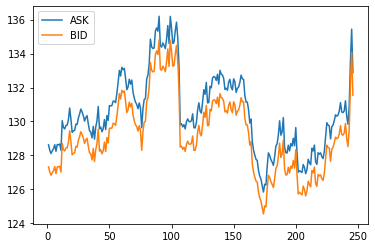

In [25]:
df[['ASK','BID']]= df[['ASK','BID']].astype('float')
df['ASK'] = df['ASK']/100
df['BID'] = df['BID']/100
df.plot.line()